In [1]:
import pandas as pd
import quandl

with open('../API.txt') as f:
    api_key = f.read()

# Amazon stock price data

In [7]:
amzn = quandl.get('WIKI/AMZN', api_key=api_key, 
                  start_date='2018-01-01', end_date='2021-08-01')
amzn.head(3)

,Open,High,Low,Close,Volume,Ex-Dividend,Split Ratio,Adj. Open,Adj. High,Adj. Low,Adj. Close,Adj. Volume
Date,,,,,,,,,,,,
2018-01-02,1172.0,1190.00,1170.51,1189.01,2587899.0,0.0,1.0,1172.0,1190.00,1170.51,1189.01,2587899.0
2018-01-03,1188.3,1205.49,1188.30,1204.20,3044664.0,0.0,1.0,1188.3,1205.49,1188.30,1204.20,3044664.0
2018-01-04,1205.0,1215.87,1204.66,1209.59,3000366.0,0.0,1.0,1205.0,1215.87,1204.66,1209.59,3000366.0


In [8]:
amzn.dtypes

Open           float64
High           float64
Low            float64
Close          float64
Volume         float64
Ex-Dividend    float64
Split Ratio    float64
Adj. Open      float64
Adj. High      float64
Adj. Low       float64
Adj. Close     float64
Adj. Volume    float64
dtype: object

# Select the closing price¶

In [9]:
close = amzn['Adj. Close']
close.head(3)

Date
2018-01-02    1189.01
2018-01-03    1204.20
2018-01-04    1209.59
Name: Adj. Close, dtype: float64

# Daily percent change

In [10]:
close_change = close.pct_change()
close_change.head()

Date
2018-01-02         NaN
2018-01-03    0.012775
2018-01-04    0.004476
2018-01-05    0.016163
2018-01-08    0.014425
Name: Adj. Close, dtype: float64

# Handling Missing Value

In [11]:
close_change = close_change.dropna()
close_change.head(3)

Date
2018-01-03    0.012775
2018-01-04    0.004476
2018-01-05    0.016163
Name: Adj. Close, dtype: float64

# Checking for Normality and Plotting the returns
The 68-95-99.7 rule can be used to determine if the data is approximately normal.

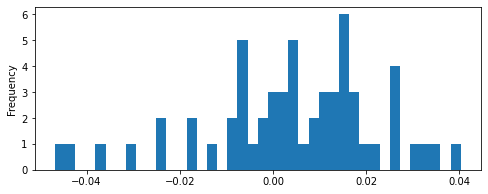

In [12]:
%matplotlib inline
close_change.plot(kind='hist', bins=40, figsize=(8, 3));

check for normality

In [13]:
mean = close_change.mean()
std = close_change.std()
mean.round(4), std.round(4)

(0.0042, 0.0186)

# number of standard deviations from the mean

In [15]:
z_score = (close_change - mean) / std
z_score.head(3)

Date
2018-01-03    0.464366
2018-01-04    0.017541
2018-01-05    0.646726
Name: Adj. Close, dtype: float64

To help make calculations easier, we will use the absolute value of the z-score.

In [17]:
z_score_abs = z_score.abs()
z_score_abs.head(2)

Date
2018-01-03    0.464366
2018-01-04    0.017541
Name: Adj. Close, dtype: float64

# Find the percentage by taking the mean
looking at 1 to 3 std

In [18]:
pct_within1 = (z_score_abs < 1).mean().round(3)
pct_within2 = (z_score_abs < 2).mean().round(3)
pct_within3 = (z_score_abs < 3).mean().round(3)

pct_within1, pct_within2, pct_within3

(0.724, 0.948, 1.0)

Using the percentile to check for normality

In [19]:
# Normal distributions return 1, 2, 3
z_score_abs.quantile([.68, .95, .997]).round(2)

0.680    0.84
0.950    1.99
0.997    2.70
Name: Adj. Close, dtype: float64